# *DATA COLLECTION*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv("/content/drive/MyDrive/salary_prediction_data.csv")
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [ ]:
df["Education"].value_counts()

,count
Education,
High School,255
Bachelor,253
PhD,251
Master,241


#DATA EXPLORATION

# **EDA**

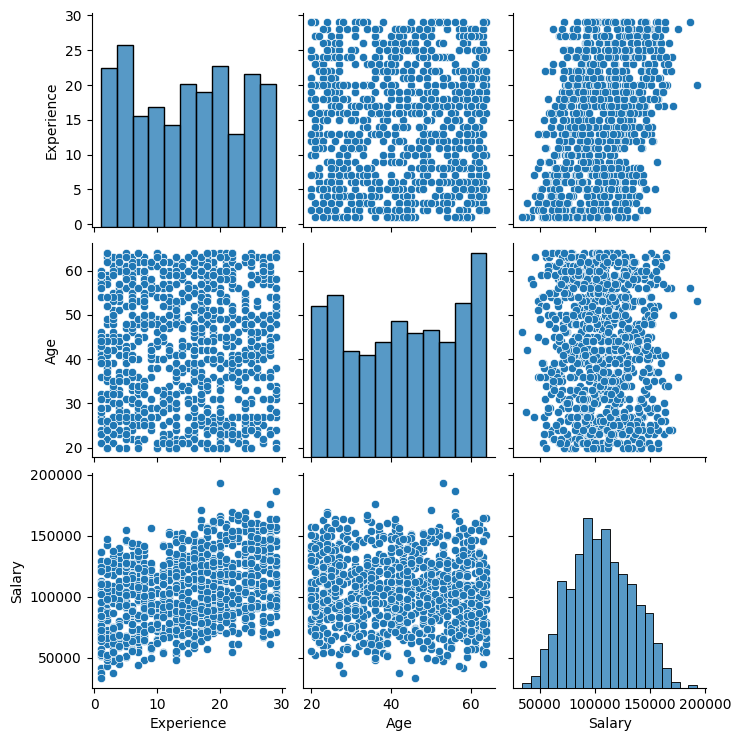

In [ ]:
sns.pairplot(df)
plt.show()

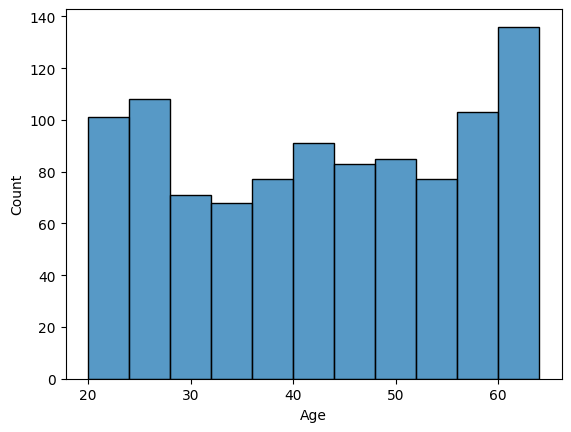

In [ ]:
sns.histplot(df['Age'])
plt.show()

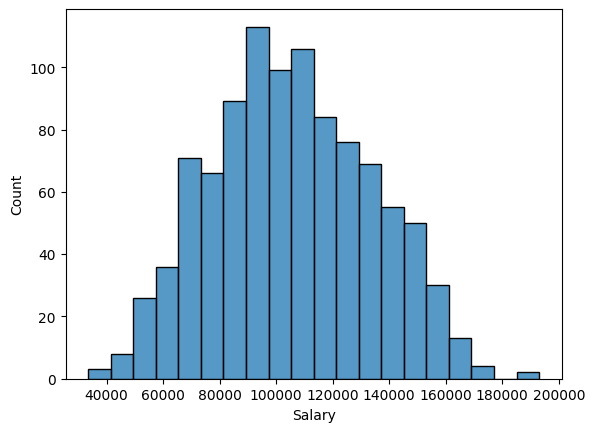

In [ ]:
sns.histplot(df['Salary'])
plt.show()

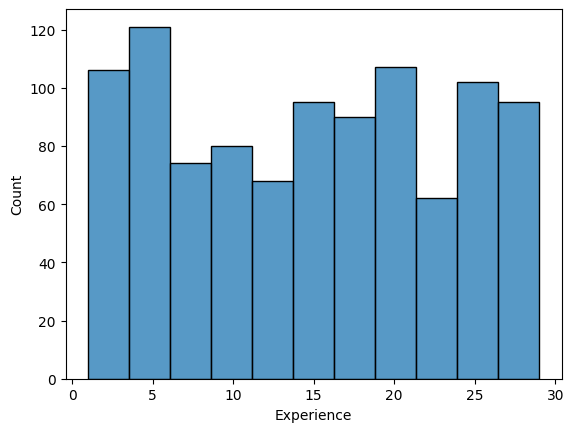

In [ ]:
sns.histplot(df['Experience'])
plt.show()

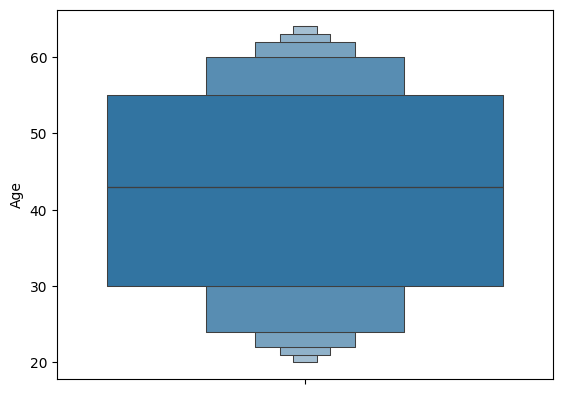

In [ ]:
sns.boxenplot(df['Age'])
plt.show()


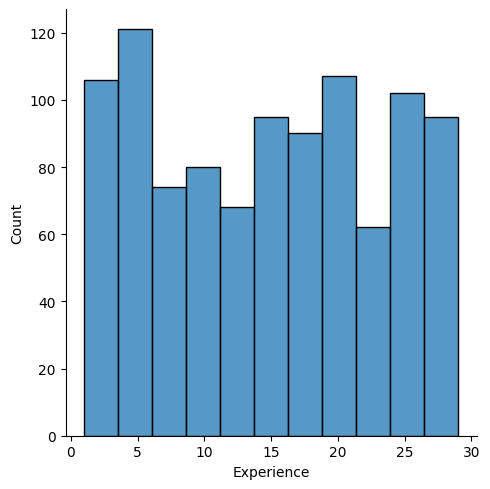

In [ ]:

sns.displot(df['Experience'])
plt.show()


# **DATA CLEANING**

In [ ]:
#encoding
df['Education'].replace({'Bachelor':0,'Master':1,'PhD':2,'High School':3},inplace=True)
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Location'].replace({'Urban':0,'Rural':1,'Suburban':2},inplace=True)
df['Job_Title'].replace({'Manager':0,'Engineer':1,'Director':2,'Analyst':3,},inplace=True)

/tmp/ipython-input-1931184262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].replace({'Bachelor':0,'Master':1,'PhD':2,'High School':3},inplace=True)
/tmp/ipython-input-1931184262.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'].replace({'Bachelor':0,'Master':1

# **REGRESSION**

In [ ]:
x=df.drop(columns=['Salary'])
y=df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,3,8,0,0,63,0,84620.053665
1,2,11,2,2,59,0,142591.255894
2,0,28,2,0,61,1,97800.255404
3,3,29,1,2,45,0,96834.671282
4,2,25,0,3,26,1,132157.786175
...,...,...,...,...,...,...,...
995,3,8,2,3,25,1,64683.389864
996,3,24,0,1,30,1,74468.205020
997,1,18,1,3,44,0,98207.026024
998,0,27,2,2,31,1,108544.922720


In [ ]:
from sklearn.linear_model import LinearRegression

# Apply the necessary replacements to x_train to make it numerical
# Correct Education encoding (handling 'PhD' with uppercase P)
x_train['Education'] = x_train['Education'].replace({'Bachelor':0,'Master':1,'PhD':2,'High School':3})

# Correct Location encoding
x_train['Location'] = x_train['Location'].replace({'Urban':0,'Rural':1,'Suburban':2})

# Correct Job_Title encoding
x_train['Job_Title'] = x_train['Job_Title'].replace({'Manager':0,'Engineer':1,'Director':2,'Analyst':3})

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# **MODEL**

In [ ]:
model.intercept_

np.float64(103468.53617216047)

In [ ]:
model.coef_

array([-3073.01482662,  1186.16298113,  -496.39689038, -1772.76779085,
        -153.05155208, -1805.78256181])

In [ ]:
train_predictions=model.predict(x_train)
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,3,8,0,0,63,0,84620.053665
1,2,11,2,2,59,0,142591.255894
2,0,28,2,0,61,1,97800.255404
3,3,29,1,2,45,0,96834.671282
4,2,25,0,3,26,1,132157.786175
...,...,...,...,...,...,...,...
995,3,8,2,3,25,1,64683.389864
996,3,24,0,1,30,1,74468.205020
997,1,18,1,3,44,0,98207.026024
998,0,27,2,2,31,1,108544.922720


# **EVALUTION**

In [ ]:
from sklearn.metrics import mean_squared_error
test_predictions=model.predict(x_test)
test_RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))
train_RMSE=np.sqrt(mean_squared_error(y_train,train_predictions))
print(train_RMSE,test_RMSE)

26270.17217400732 24916.9951822302


In [ ]:
from sklearn.metrics import mean_absolute_error

train_predictions = model.predict(x_train)

print("MAE for test data:",mean_absolute_error(y_test,test_predictions))
print("MAE for train data:",mean_absolute_error(y_train,train_predictions))


MAE for test data: 21388.454236640828
MAE for train data: 22060.64059438487


In [ ]:
from sklearn.metrics import mean_absolute_error

train_predictions = model.predict(x_train)

print("MSE for test data:",mean_absolute_error(y_test,test_predictions))
print("MSE for train data:",mean_absolute_error(y_train,train_predictions))


MSE for test data: 21388.454236640828
MSE for train data: 22060.64059438487


In [ ]:
import numpy as np
print("RMSE for test data:",np.sqrt(mean_absolute_error(y_test,test_predictions)))
print("RMSE for train data:",np.sqrt(mean_absolute_error(y_train,train_predictions)))

RMSE for test data: 146.24792045236345
RMSE for train data: 148.52824847275642


In [ ]:
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,test_predictions))
print("R2 for train data:",r2_score(y_train,train_predictions))

R2 for test data: 0.08405817066950005
R2 for train data: 0.14828368314788754


In [ ]:
model.score(x_test,y_test)

0.08405817066950005

# **polynomial regression**

In [45]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)
x_train=pd.DataFrame(polynomial_converter.fit_transform(x_train))
x_test=pd.DataFrame(polynomial_converter.fit_transform(x_test))

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [47]:
model.intercept_

np.float64(112376.37525123866)

In [48]:
model.coef_

array([-7.83788456e+03, -1.29957770e+03, -1.97767202e+04, -6.73920376e+04,
       -5.98162922e+02,  2.31559573e+03,  3.91806590e+04,  2.28650211e+01,
        6.09665733e+03,  2.26666587e+03, -8.69380574e+01, -2.19064179e+03,
        9.82809727e+01,  7.39700974e+02,  2.11708378e+02,  3.71047232e+01,
        5.57762054e+01, -1.08417803e+04,  5.91947561e+03,  2.81669374e+02,
       -4.13381231e+03,  5.62744734e+04,  1.54083028e+02,  3.99972884e+03,
        1.14940759e+01, -1.90126710e+02,  2.31559573e+03, -1.25922754e+04,
       -4.64124351e+01, -1.10850753e+03,  2.78300053e+02, -3.21990085e+01,
        5.84331376e+02, -5.81369483e-01, -2.14644709e+01, -7.53322818e+01,
        5.80084499e+00,  7.28183493e+01, -1.39280522e+03, -3.80002219e+02,
        1.60821773e+01,  5.21883281e+02, -3.47087696e+02, -5.73671356e+00,
       -4.13830585e+02,  1.09130032e+00,  2.53838950e+01, -2.19064179e+03,
       -1.01403634e+00, -1.26054446e+01, -4.08525774e+00, -6.32334969e-01,
       -1.99681286e+01, -

In [49]:
train_predictions=model.predict(x_train)
test_predictions=model.predict(x_test)

In [50]:
from sklearn.metrics import mean_absolute_error
print('MAE for test data:',mean_absolute_error(y_test,test_predictions))
print('MAE for train data:',mean_absolute_error(y_train,train_predictions))

MAE for test data: 7829.62835224885
MAE for train data: 7550.694996350014


In [52]:
from sklearn.metrics import r2_score
print('R2 for test data:',r2_score(y_test,test_predictions))
print('R2 for train data:',r2_score(y_train,train_predictions))

R2 for test data: 0.8560602510624691
R2 for train data: 0.8896382988909597


In [53]:
import numpy as np
print('RMSE for test data:',np.sqrt(mean_squared_error(y_test,test_predictions)))
print('RMSE for train data:',np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data: 9877.614944489667
RMSE for train data: 9456.373744080924


In [54]:
model.score(x_test,y_test)

0.8560602510624691

In [55]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
scores

array([0.02566468, 0.09712665, 0.21481693, 0.15203326, 0.07829868])

***lesso regression***

In [57]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.011e+10, tolerance: 7.292e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [58]:
from sklearn.metrics import mean_absolute_error
train_predictions=lasso_model.predict(x_train)
test_predictions=lasso_model.predict(x_test)
print('MAE for test data:',mean_absolute_error(y_test,test_predictions))
print('MAE for train data:',mean_absolute_error(y_train,train_predictions))


MAE for test data: 8404.941220474975
MAE for train data: 8527.151340215078


In [59]:
from sklearn.metrics import r2_score
print('R2 for test data:',r2_score(y_test,test_predictions))
print('R2 for train data:',r2_score(y_train,train_predictions))


R2 for test data: 0.8323572575385421
R2 for train data: 0.8626361363084921


In [60]:
from sklearn.metrics import mean_squared_error
print('RMSE for test data:',np.sqrt(mean_squared_error(y_test,test_predictions)))
print('RMSE for train data:',np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data: 10659.92379882073
RMSE for train data: 10549.981168288048


In [61]:
model.score(x_test,y_test)

0.8560602510624691

In [62]:
from joblib import dump


In [63]:
dump(model,'RMSE.joblib')

['RMSE.joblib']